# ANOVA

Use:

Used to compare the means of more than 2 groups

groups mean differences inferred by analyzing variances

Assumptions:

Residuals (experimental error) are normally distributed

Homogeneity of variances (variances are equal between groups) 

Observations are sampled independently 

Hypothesis:

Null hypotheses: Groups means are equal (no variation in means of groups)

Alternative hypotheses: At least, one group mean is different from other groups

# One-Way ANOVA

Considering Balanced data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df_oneway=pd.read_excel(r"C:\Paramatma_Pulivarthi\Data_Science_course\Anova.xlsx",sheet_name='one_way_anova')

In [28]:
##checking the data
df_oneway

,Drug,Sales(in 100's)
0,Aspirin,11.892117
1,Aspirin,18.620222
2,Aspirin,20.018923
3,Aspirin,10.971042
4,Aspirin,12.960602
5,Aspirin,17.009329
6,Aspirin,12.394139
7,Aspirin,13.749822
8,Aspirin,6.719919
9,Aspirin,11.754593


In [29]:
## checking the columns
df_oneway.columns

Index(['Drug', 'Sales(in 100's)'], dtype='object')

In [30]:
## checking basic information or variable types
df_oneway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Drug             39 non-null     object 
 1   Sales(in 100's)  39 non-null     float64
dtypes: float64(1), object(1)
memory usage: 752.0+ bytes


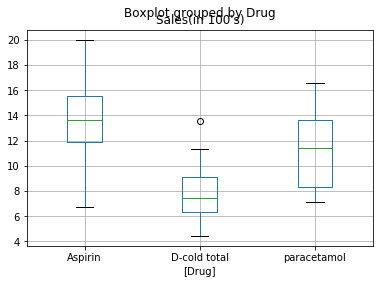

In [31]:
## EDA-Boxplot
df_oneway.boxplot(by='Drug')

Sales(in 100's)    0.011688
dtype: float64

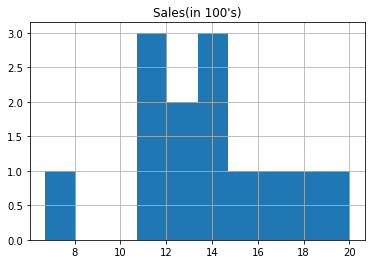

In [32]:
#EDA-Histogram--- checking the normality
df_oneway[df_oneway.Drug=='Aspirin'].hist()
df_oneway[df_oneway.Drug=='Aspirin'].skew()


Sales(in 100's)    0.81132
dtype: float64

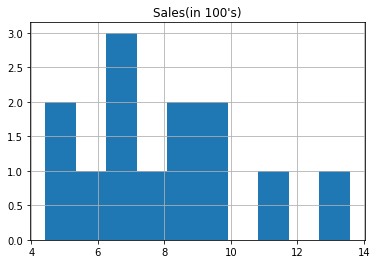

In [33]:
df_oneway[df_oneway.Drug=='D-cold total'].hist()
df_oneway[df_oneway.Drug=='D-cold total'].skew()

Sales(in 100's)    0.279893
dtype: float64

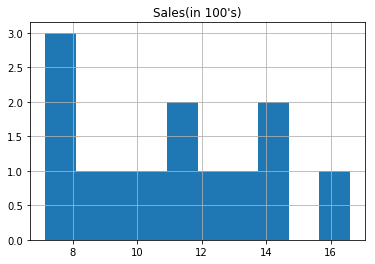

In [34]:
df_oneway[df_oneway.Drug=='paracetamol'].hist()
df_oneway[df_oneway.Drug=='paracetamol'].skew()

In [36]:
import scipy.stats as stats
# syntax:scipy.stats.f_oneway(*args, axis=0)
# # return statistic, p-value

In [37]:
df_oneway_Aspirin=df_oneway[df_oneway['Drug']=='Aspirin']
df_oneway_dcold=df_oneway[df_oneway['Drug']=='D-cold total']
df_oneway_parace=df_oneway[df_oneway['Drug']=='paracetamol']

In [38]:
df_oneway_Aspirin

,Drug,Sales(in 100's)
0,Aspirin,11.892117
1,Aspirin,18.620222
2,Aspirin,20.018923
3,Aspirin,10.971042
4,Aspirin,12.960602
5,Aspirin,17.009329
6,Aspirin,12.394139
7,Aspirin,13.749822
8,Aspirin,6.719919
9,Aspirin,11.754593


In [39]:
oneway_stat, oneway_p_val =stats.f_oneway(df_oneway_Aspirin["Sales(in 100's)"],df_oneway_dcold["Sales(in 100's)"],df_oneway_parace["Sales(in 100's)"])
print("********** Oneway ANOVA Value ************ \n",oneway_stat," \n ******** p-value ********** \n",oneway_p_val)

********** Oneway ANOVA Value ************ 
 12.1242894211351  
 ******** p-value ********** 
 9.42762904079332e-05


In [40]:
alpha = 0.05
if oneway_p_val <= alpha: 
    print("*****************  Reject the Null Hypothesis ************* \n At least, one group mean is different from other groups \n") 
else: 
    print("*****************  Accept the Null Hypothesis ************* \n Groups means are equal (no variation in means of groups) \n")

*****************  Reject the Null Hypothesis ************* 
 At least, one group mean is different from other groups 



# Two-Way ANOVA

In [41]:
df_twoway=pd.read_excel(r"C:\Paramatma_Pulivarthi\Data_Science_course\Anova.xlsx",sheet_name='two_way_anova_ex')

In [44]:
df_twoway

,Drug,Doctor,Sales_in_100s
0,Aspirin,Doctor_A,11.892117
1,Aspirin,Doctor_A,18.620222
2,Aspirin,Doctor_A,20.018923
3,Aspirin,Doctor_A,10.971042
4,Aspirin,Doctor_B,12.960602
5,Aspirin,Doctor_B,17.009329
6,Aspirin,Doctor_B,12.394139
7,Aspirin,Doctor_B,13.749822
8,Aspirin,Doctor_B,6.719919
9,Aspirin,Doctor_C,11.754593


In [46]:
df_twoway.columns

Index(['Drug', 'Doctor', 'Sales_in_100s'], dtype='object')

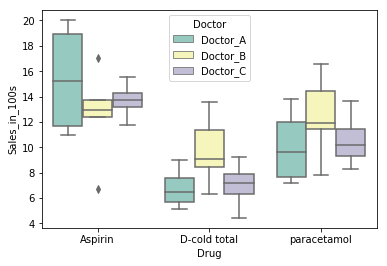

In [47]:
import seaborn as sns
sns.boxplot(x="Drug", y="Sales_in_100s", hue="Doctor", data=df_twoway, palette="Set3")

In [49]:
import statsmodels.api as sm

C:\Users\ppulivarthi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [50]:
from statsmodels.formula.api import ols

In [51]:
model = ols(' Sales_in_100s ~ C(Drug) + C(Doctor)', data=df_twoway).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Drug),218.140261,2.0,11.815445,0.000127
C(Doctor),9.997003,2.0,0.541482,0.586820
Residual,313.859066,34.0,NaN,NaN


In [52]:
alpha = 0.05
Drug=0.000127

if Drug <= alpha: 
    print("*****************  Reject the Null Hypothesis ************* \n At least, one group mean is different from other groups \n") 
else: 
    print("*****************  Accept the Null Hypothesis ************* \n Groups means are equal (no variation in means of groups)  \n")

*****************  Reject the Null Hypothesis ************* 
 At least, one group mean is different from other groups 



In [53]:
alpha = 0.05
Doctor=0.586820

if Doctor <= alpha: 
    print("*****************  Reject the Null Hypothesis ************* \n At least, one group mean is different from other groups \n") 
else: 
    print("*****************  Accept the Null Hypothesis ************* \n Groups means are equal (no variation in means of groups)  \n")

*****************  Accept the Null Hypothesis ************* 
 Groups means are equal (no variation in means of groups)  



# ANOVA -Interactions

In [54]:
model = ols(' Sales_in_100s ~ C(Drug) + C(Doctor) + C(Drug):C(Doctor)', data=df_twoway).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Drug),218.140261,2.0,12.276084,0.000127
C(Doctor),9.997003,2.0,0.562592,0.575625
C(Drug):C(Doctor),47.316085,4.0,1.331382,0.281115
Residual,266.542980,30.0,NaN,NaN


In [55]:
alpha = 0.05
Drug_Doctor=0.281115

if Drug_Doctor <= alpha: 
    print("*****************  Reject the Null Hypothesis ************* \n At least, one group mean is different from other groups \n") 
else: 
    print("*****************  Accept the Null Hypothesis ************* \n Groups means are equal (no variation in means of groups)  \n")

*****************  Accept the Null Hypothesis ************* 
 Groups means are equal (no variation in means of groups)  

